
# Project: Investigate a Dataset (European Soccer Database)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The database consists of seven tables namely 'Country', 'League', 'Player', 'Player Attributes', 'Team', 'Team Attributes', and 'Match'. It shows the soccer database from several European countries, from 2008 to 2016. The original source of the database can be found on Kaggle. <br>

## Research Questions
> Which are the top 3 leagues that had the most wins during 2008-2016?<br>
> What teams improved the most over the time period?<br>
> Which players had the most penalties?<br>
> What team attributes lead to the most victories?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlalchemy as sqla
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# connect to the SQLite database with SQLAlchemy and read data
soccer = sqla.create_engine('sqlite:///database.sqlite')
# retrive necessary tables
df_country = pd.read_sql('select * from Country', soccer)
df_league = pd.read_sql('select * from League', soccer)
df_player = pd.read_sql('select * from Player_Attributes', soccer)
df_player_name = pd.read_sql('select * from Player', soccer)
df_team = pd.read_sql('select * from Team_Attributes', soccer)
df_team_name = pd.read_sql('select * from Team', soccer)
df_match = pd.read_sql('select * from Match', soccer)

In [3]:
# general description of data
df_player.head(1)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [4]:
# see how many columns and rows
df_player.shape

(183978, 42)

In [5]:
# looking fo any missing data and checking data types
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [6]:
# general description of data
df_team.head(1)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover


In [7]:
# see how many columns and rows
df_team.shape

(1458, 25)

In [8]:
# looking fo any missing data and checking data types
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

In [9]:
# general description of data
df_match.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.0,1.65,3.4,4.5,1.78,3.25,4.0,1.73,3.4,4.2


In [10]:
# see how many columns and rows
df_match.shape

(25979, 115)

In [11]:
# looking fo any missing data and checking data types
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [12]:
#checking for duplication
sum(df_team.duplicated())

0

In [13]:
#checking for duplication
sum(df_player.duplicated())

0

In [14]:
#checking for duplication
sum(df_match.duplicated())

0

### Data Cleaning 

__1-Dropping and removing null values__

In [15]:
# Cheking Null values
df_match.isnull().sum().sum()

407395

In [16]:
df_match.isnull().sum()

id                0
country_id        0
league_id         0
season            0
stage             0
              ...  
GBD           11817
GBA           11817
BSH           11818
BSD           11818
BSA           11818
Length: 115, dtype: int64

In [17]:
#drop Null values and unwanted col
df_match.dropna(axis=1,inplace=True)

In [18]:
df_match.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1


In [19]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                25979 non-null  int64 
 1   country_id        25979 non-null  int64 
 2   league_id         25979 non-null  int64 
 3   season            25979 non-null  object
 4   stage             25979 non-null  int64 
 5   date              25979 non-null  object
 6   match_api_id      25979 non-null  int64 
 7   home_team_api_id  25979 non-null  int64 
 8   away_team_api_id  25979 non-null  int64 
 9   home_team_goal    25979 non-null  int64 
 10  away_team_goal    25979 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 2.2+ MB


In [20]:
# Cheking Null values
df_team.isnull().sum().sum()

969

In [21]:
df_team.isnull().sum()

id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

In [22]:
# drop Null Values
df_team.dropna(axis=0, how='any', inplace=True)

In [23]:
# Cheking Null values
df_player.isnull().sum().sum()

47301

In [24]:
df_player.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [25]:
df_player.head(1)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [26]:
# drop Null Values
df_player.dropna(axis=0, how='any', inplace=True)

In [27]:
# checking null values
df_player.isnull().sum().any()

False

In [28]:
# checking null values
df_team.isnull().sum().any()

False

In [29]:
# checking null values
df_match.isnull().sum().any()

False

In [30]:
df_player.shape

(180354, 42)

In [31]:
df_team.shape

(489, 25)

In [32]:
df_match.shape

(25979, 11)

__2-Modifying df_team__

In [33]:
# replacing country id and team id in df_match by their name
df_league.head(1)

,id,country_id,name
0,1,1,Belgium Jupiler League


In [34]:
df_league.rename(columns={'name':'league_name'},inplace=True)

In [35]:
df_country.head(1)

,id,name
0,1,Belgium


In [36]:
df_country.rename(columns={'name':'country_name'},inplace=True)

In [37]:
df_combined = df_league.merge(df_country,left_on='id',right_on='id',how='outer')
df_combined.head(11)

,id,country_id,league_name,country_name
0,1,1,Belgium Jupiler League,Belgium
1,1729,1729,England Premier League,England
2,4769,4769,France Ligue 1,France
3,7809,7809,Germany 1. Bundesliga,Germany
4,10257,10257,Italy Serie A,Italy
5,13274,13274,Netherlands Eredivisie,Netherlands
6,15722,15722,Poland Ekstraklasa,Poland
7,17642,17642,Portugal Liga ZON Sagres,Portugal
8,19694,19694,Scotland Premier League,Scotland
9,21518,21518,Spain LIGA BBVA,Spain


In [38]:
df_match['league_id'].replace({1:'Belgium Jupiler League',1729:'England Premier League',4769:'France Ligue 1',7809:'Germany 1. Bundesliga',10257:'Italy Serie A',13274:'Netherlands Eredivisie',15722:'Poland Ekstraklasa',17642:'Portugal Liga ZON Sagres',19694:'Scotland Premier League',21518:'Spain LIGA BBVA',24558:'Switzerland Super League'},inplace=True)

In [39]:
df_match['country_id'].replace({1:'Belgium',1729:'England',4769:'France',7809:'Germany',1025:'Italy',13274:'Netherlands',15722:'Poland',17642:'Portugal',19694:'Scotland',21518:'Spain',24558:'Switzerland'},inplace=True)

In [40]:
df_match.rename(columns={'country_id':'country','league_id':'league'},inplace=True)

In [41]:
#drop unwanted col
df_match.drop(columns=['match_api_id','date'],inplace=True)


In [42]:
#create a column in Matches to see which is the winner of the match
conditions = [(df_match['home_team_goal'] > df_match['away_team_goal']), (df_match['home_team_goal'] < df_match['away_team_goal'])]
choices = [df_match['home_team_api_id'], df_match['away_team_api_id']]
df_match['winner'] = np.select(conditions, choices, default='equal')

In [43]:
df_match.head(5)

,id,country,league,season,stage,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,winner
0,1,Belgium,Belgium Jupiler League,2008/2009,1,9987,9993,1,1,equal
1,2,Belgium,Belgium Jupiler League,2008/2009,1,10000,9994,0,0,equal
2,3,Belgium,Belgium Jupiler League,2008/2009,1,9984,8635,0,3,8635
3,4,Belgium,Belgium Jupiler League,2008/2009,1,9991,9998,5,0,9991
4,5,Belgium,Belgium Jupiler League,2008/2009,1,7947,9985,1,3,9985


In [44]:
df_match.drop(columns=['away_team_goal','home_team_goal','home_team_api_id','away_team_api_id'],inplace=True)

In [45]:
#drop row with equal value
filt= (df_match[df_match['winner'] == 'equal'])
df_match.drop(index=filt.index,inplace=True)
df_match.head(5)

,id,country,league,season,stage,winner
2,3,Belgium,Belgium Jupiler League,2008/2009,1,8635
3,4,Belgium,Belgium Jupiler League,2008/2009,1,9991
4,5,Belgium,Belgium Jupiler League,2008/2009,1,9985
7,8,Belgium,Belgium Jupiler League,2008/2009,1,9996
8,9,Belgium,Belgium Jupiler League,2008/2009,1,10001


In [46]:
df_match.shape

(19383, 6)

__3-Modifying df_player__

In [47]:
df_player_name.head(1)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187


In [48]:
df_player.head(1)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [49]:
df_player_name.drop(columns=['id','player_fifa_api_id'],inplace=True)
df_player = df_player.merge(df_player_name,left_on='player_api_id',right_on='player_api_id',how='outer')
df_player.head(10)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,birthday,height,weight
0,1.0,218353.0,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
1,2.0,218353.0,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
2,3.0,218353.0,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
3,4.0,218353.0,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
4,5.0,218353.0,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
5,6.0,189615.0,155782,2016-04-21 00:00:00,74.0,76.0,left,high,medium,80.0,...,78.0,14.0,7.0,9.0,9.0,12.0,Aaron Cresswell,1989-12-15 00:00:00,170.18,146
6,7.0,189615.0,155782,2016-04-07 00:00:00,74.0,76.0,left,high,medium,80.0,...,78.0,14.0,7.0,9.0,9.0,12.0,Aaron Cresswell,1989-12-15 00:00:00,170.18,146
7,8.0,189615.0,155782,2016-01-07 00:00:00,73.0,75.0,left,high,medium,79.0,...,78.0,14.0,7.0,9.0,9.0,12.0,Aaron Cresswell,1989-12-15 00:00:00,170.18,146
8,9.0,189615.0,155782,2015-12-24 00:00:00,73.0,75.0,left,high,medium,79.0,...,78.0,14.0,7.0,9.0,9.0,12.0,Aaron Cresswell,1989-12-15 00:00:00,170.18,146
9,10.0,189615.0,155782,2015-12-17 00:00:00,73.0,75.0,left,high,medium,79.0,...,78.0,14.0,7.0,9.0,9.0,12.0,Aaron Cresswell,1989-12-15 00:00:00,170.18,146


In [50]:
#drop unwanted col
df_player.drop(columns=['player_fifa_api_id','id','player_api_id','date'],inplace=True)

In [51]:
df_player.set_index('player_name',inplace=True)

In [52]:
df_player.head(10)

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,birthday,height,weight
player_name,,,,,,,,,,,,,,,,,,,,,
Aaron Appindangoye,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1992-02-29 00:00:00,182.88,187
Aaron Appindangoye,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1992-02-29 00:00:00,182.88,187
Aaron Appindangoye,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,66.0,69.0,6.0,11.0,10.0,8.0,8.0,1992-02-29 00:00:00,182.88,187
Aaron Appindangoye,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,63.0,66.0,5.0,10.0,9.0,7.0,7.0,1992-02-29 00:00:00,182.88,187
Aaron Appindangoye,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,63.0,66.0,5.0,10.0,9.0,7.0,7.0,1992-02-29 00:00:00,182.88,187
Aaron Cresswell,74.0,76.0,left,high,medium,80.0,53.0,58.0,71.0,40.0,...,75.0,78.0,14.0,7.0,9.0,9.0,12.0,1989-12-15 00:00:00,170.18,146
Aaron Cresswell,74.0,76.0,left,high,medium,80.0,53.0,58.0,71.0,32.0,...,75.0,78.0,14.0,7.0,9.0,9.0,12.0,1989-12-15 00:00:00,170.18,146
Aaron Cresswell,73.0,75.0,left,high,medium,79.0,52.0,57.0,70.0,29.0,...,75.0,78.0,14.0,7.0,9.0,9.0,12.0,1989-12-15 00:00:00,170.18,146
Aaron Cresswell,73.0,75.0,left,high,medium,79.0,51.0,57.0,70.0,29.0,...,75.0,78.0,14.0,7.0,9.0,9.0,12.0,1989-12-15 00:00:00,170.18,146


In [53]:
df_player.shape

(181004, 41)

__4-Modifying df_team__

In [54]:
df_team.head(1)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover


In [55]:
df_team_name.drop(columns=['team_fifa_api_id','id'],inplace=True)
df_team = df_team.merge(df_team_name,left_on='team_api_id',right_on='team_api_id',how='outer')
df_team.drop(columns=['id','team_fifa_api_id','team_short_name'],inplace=True)
df_team.set_index('team_long_name',inplace=True)

In [56]:
df_team.head(10)

,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
team_long_name,,,,,,,,,,,,,,,,,,,,,
FC Aarau,9930,2014-09-19 00:00:00,52.0,Balanced,48.0,Normal,56.0,Mixed,Organised,54.0,...,64.0,Normal,Organised,47.0,Medium,44.0,Press,54.0,Normal,Cover
FC Aarau,9930,2015-09-10 00:00:00,47.0,Balanced,41.0,Normal,54.0,Mixed,Organised,54.0,...,64.0,Normal,Organised,47.0,Medium,44.0,Press,54.0,Normal,Cover
Aberdeen,8485,2014-09-19 00:00:00,58.0,Balanced,64.0,Normal,62.0,Mixed,Organised,56.0,...,57.0,Normal,Organised,41.0,Medium,42.0,Press,60.0,Normal,Cover
Aberdeen,8485,2015-09-10 00:00:00,59.0,Balanced,64.0,Normal,53.0,Mixed,Organised,51.0,...,63.0,Normal,Free Form,49.0,Medium,45.0,Press,63.0,Normal,Cover
AC Ajaccio,8576,2014-09-19 00:00:00,59.0,Balanced,57.0,Normal,52.0,Mixed,Organised,48.0,...,52.0,Normal,Organised,38.0,Medium,47.0,Press,53.0,Normal,Cover
AC Ajaccio,8576,2015-09-10 00:00:00,59.0,Balanced,57.0,Normal,52.0,Mixed,Organised,48.0,...,52.0,Normal,Organised,38.0,Medium,47.0,Press,53.0,Normal,Cover
Milan,8564,2014-09-19 00:00:00,48.0,Balanced,70.0,Lots,52.0,Mixed,Organised,66.0,...,75.0,Lots,Organised,58.0,Medium,57.0,Press,49.0,Normal,Cover
Milan,8564,2015-09-10 00:00:00,48.0,Balanced,70.0,Lots,52.0,Mixed,Organised,66.0,...,69.0,Lots,Organised,58.0,Medium,57.0,Press,49.0,Normal,Cover
Académica de Coimbra,10215,2014-09-19 00:00:00,52.0,Balanced,53.0,Normal,44.0,Mixed,Organised,55.0,...,60.0,Normal,Organised,39.0,Medium,38.0,Press,61.0,Normal,Cover


In [57]:
df_team.shape

(526, 23)

In [58]:
df_team['date'] = df_team['date'].astype(str)
df_team['date'].apply(lambda x : x.split()[0])
df_team['date'] = pd.to_datetime(df_team['date'])

In [59]:
df_team.isnull().sum()

team_api_id                        0
date                              37
buildUpPlaySpeed                  37
buildUpPlaySpeedClass             37
buildUpPlayDribbling              37
buildUpPlayDribblingClass         37
buildUpPlayPassing                37
buildUpPlayPassingClass           37
buildUpPlayPositioningClass       37
chanceCreationPassing             37
chanceCreationPassingClass        37
chanceCreationCrossing            37
chanceCreationCrossingClass       37
chanceCreationShooting            37
chanceCreationShootingClass       37
chanceCreationPositioningClass    37
defencePressure                   37
defencePressureClass              37
defenceAggression                 37
defenceAggressionClass            37
defenceTeamWidth                  37
defenceTeamWidthClass             37
defenceDefenderLineClass          37
dtype: int64

In [60]:
df_team.dropna(axis=0, how='any',inplace=True)

In [61]:
df_team.isnull().sum().all()

False

In [62]:
df_match.isnull().sum().all()

False

In [63]:
df_player.isnull().sum().all()

False

In [64]:
# saving cleaned and modified CVS
df_team.to_csv('modified_team.csv')
df_player.to_csv('modified_match.csv')
df_match.to_csv('modified_player.csv')


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which are the top 3 leagues that had the most wins during 2008-2016?)

In [65]:
df_match.head(5)

,id,country,league,season,stage,winner
2,3,Belgium,Belgium Jupiler League,2008/2009,1,8635
3,4,Belgium,Belgium Jupiler League,2008/2009,1,9991
4,5,Belgium,Belgium Jupiler League,2008/2009,1,9985
7,8,Belgium,Belgium Jupiler League,2008/2009,1,9996
8,9,Belgium,Belgium Jupiler League,2008/2009,1,10001


In [66]:
df_match['league'].value_counts()

Spain LIGA BBVA             2336
England Premier League      2257
Italy Serie A               2221
France Ligue 1              2181
Netherlands Eredivisie      1867
Germany 1. Bundesliga       1851
Portugal Liga ZON Sagres    1519
Poland Ekstraklasa          1395
Scotland Premier League     1377
Belgium Jupiler League      1303
Switzerland Super League    1076
Name: league, dtype: int64

In [67]:
graph = df_match.groupby('league')['winner'].count()

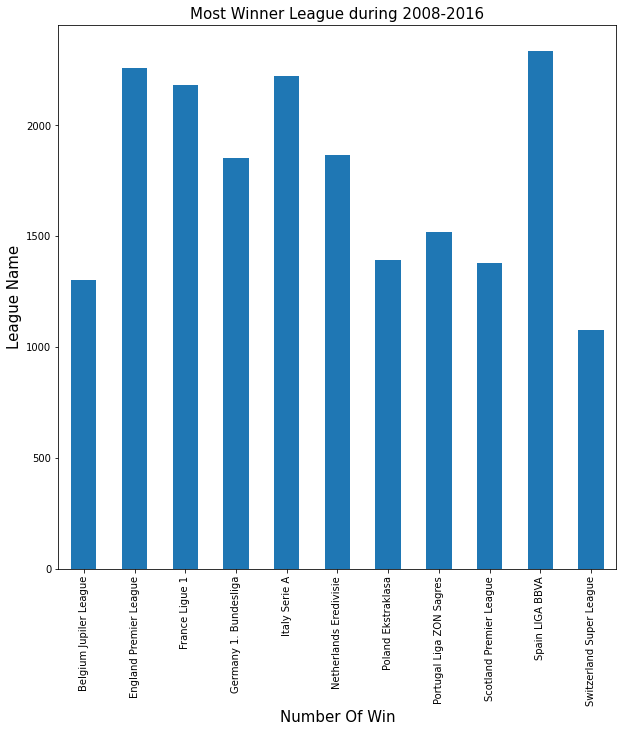

In [68]:
graph.plot(kind='bar',figsize = (10,10));
plt.xlabel('Number Of Win',fontsize = 15);  
plt.ylabel('League Name',fontsize = 15);  
plt.title('Most Winner League during 2008-2016',fontsize = 15);    

__From above, we can see that Spain LIGA BBVA, England Premier League, Italy Serie A have the most wins during 2008-2016__

### Research Question 2  (What teams improved the most over the time period?)

In [69]:
# compare team within time period
df_team.head(5)

,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
team_long_name,,,,,,,,,,,,,,,,,,,,,
FC Aarau,9930,2014-09-19,52.0,Balanced,48.0,Normal,56.0,Mixed,Organised,54.0,...,64.0,Normal,Organised,47.0,Medium,44.0,Press,54.0,Normal,Cover
FC Aarau,9930,2015-09-10,47.0,Balanced,41.0,Normal,54.0,Mixed,Organised,54.0,...,64.0,Normal,Organised,47.0,Medium,44.0,Press,54.0,Normal,Cover
Aberdeen,8485,2014-09-19,58.0,Balanced,64.0,Normal,62.0,Mixed,Organised,56.0,...,57.0,Normal,Organised,41.0,Medium,42.0,Press,60.0,Normal,Cover
Aberdeen,8485,2015-09-10,59.0,Balanced,64.0,Normal,53.0,Mixed,Organised,51.0,...,63.0,Normal,Free Form,49.0,Medium,45.0,Press,63.0,Normal,Cover
AC Ajaccio,8576,2014-09-19,59.0,Balanced,57.0,Normal,52.0,Mixed,Organised,48.0,...,52.0,Normal,Organised,38.0,Medium,47.0,Press,53.0,Normal,Cover


In [70]:
df_team.columns

Index(['team_api_id', 'date', 'buildUpPlaySpeed', 'buildUpPlaySpeedClass',
       'buildUpPlayDribbling', 'buildUpPlayDribblingClass',
       'buildUpPlayPassing', 'buildUpPlayPassingClass',
       'buildUpPlayPositioningClass', 'chanceCreationPassing',
       'chanceCreationPassingClass', 'chanceCreationCrossing',
       'chanceCreationCrossingClass', 'chanceCreationShooting',
       'chanceCreationShootingClass', 'chanceCreationPositioningClass',
       'defencePressure', 'defencePressureClass', 'defenceAggression',
       'defenceAggressionClass', 'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass'],
      dtype='object')

In [71]:
df_team.drop(columns=['buildUpPlaySpeedClass','buildUpPlayPositioningClass','buildUpPlayDribblingClass','buildUpPlayPassingClass','chanceCreationPassingClass','chanceCreationCrossingClass','chanceCreationShootingClass','chanceCreationPositioningClass','defencePressureClass','defenceAggressionClass','defenceTeamWidthClass','defenceDefenderLineClass'],inplace=True)

In [72]:
df_team.columns

Index(['team_api_id', 'date', 'buildUpPlaySpeed', 'buildUpPlayDribbling',
       'buildUpPlayPassing', 'chanceCreationPassing', 'chanceCreationCrossing',
       'chanceCreationShooting', 'defencePressure', 'defenceAggression',
       'defenceTeamWidth'],
      dtype='object')

In [73]:
df_team.reset_index(inplace=True)

In [74]:
#make df with 1rst period 2014-09-19
filt_1 = df_team[df_team['date']=='2014-09-19']
filt_1

,team_long_name,team_api_id,date,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,FC Aarau,9930,2014-09-19,52.0,48.0,56.0,54.0,63.0,64.0,47.0,44.0,54.0
2,Aberdeen,8485,2014-09-19,58.0,64.0,62.0,56.0,68.0,57.0,41.0,42.0,60.0
4,AC Ajaccio,8576,2014-09-19,59.0,57.0,52.0,48.0,38.0,52.0,38.0,47.0,53.0
6,Milan,8564,2014-09-19,48.0,70.0,52.0,66.0,36.0,75.0,58.0,57.0,49.0
8,Académica de Coimbra,10215,2014-09-19,52.0,53.0,44.0,55.0,51.0,60.0,39.0,38.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...
480,BSC Young Boys,10192,2014-09-19,52.0,56.0,64.0,39.0,66.0,46.0,44.0,34.0,50.0
482,Zagłębie Lubin,8021,2014-09-19,33.0,49.0,51.0,38.0,63.0,48.0,58.0,38.0,52.0
483,Real Zaragoza,8394,2014-09-19,38.0,48.0,35.0,53.0,56.0,57.0,51.0,46.0,61.0
485,Zawisza Bydgoszcz,8027,2014-09-19,54.0,51.0,40.0,67.0,49.0,52.0,44.0,47.0,52.0


In [75]:
#make df with 1rst period 2014-09-19
filt_2 = df_team[df_team['date']=='2015-09-10']
filt_2

,team_long_name,team_api_id,date,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
1,FC Aarau,9930,2015-09-10,47.0,41.0,54.0,54.0,63.0,64.0,47.0,44.0,54.0
3,Aberdeen,8485,2015-09-10,59.0,64.0,53.0,51.0,72.0,63.0,49.0,45.0,63.0
5,AC Ajaccio,8576,2015-09-10,59.0,57.0,52.0,48.0,38.0,52.0,38.0,47.0,53.0
7,Milan,8564,2015-09-10,48.0,70.0,52.0,66.0,36.0,69.0,58.0,57.0,49.0
9,Académica de Coimbra,10215,2015-09-10,53.0,53.0,44.0,55.0,51.0,60.0,39.0,38.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...
479,Wolverhampton Wanderers,8602,2015-09-10,46.0,36.0,54.0,55.0,47.0,48.0,47.0,48.0,55.0
481,BSC Young Boys,10192,2015-09-10,52.0,56.0,64.0,39.0,66.0,46.0,44.0,34.0,50.0
484,Real Zaragoza,8394,2015-09-10,52.0,52.0,50.0,52.0,56.0,57.0,48.0,43.0,49.0
486,Zawisza Bydgoszcz,8027,2015-09-10,54.0,51.0,40.0,46.0,49.0,52.0,44.0,47.0,52.0


In [76]:
filt_1.drop(columns=['team_api_id'],inplace=True)

c:\users\htm\pycharmprojects\pythonproject\venv\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [77]:
filt_1.columns

Index(['team_long_name', 'date', 'buildUpPlaySpeed', 'buildUpPlayDribbling',
       'buildUpPlayPassing', 'chanceCreationPassing', 'chanceCreationCrossing',
       'chanceCreationShooting', 'defencePressure', 'defenceAggression',
       'defenceTeamWidth'],
      dtype='object')

In [78]:
filt_1.rename(columns=lambda x:  x +'_2014',inplace=True)

c:\users\htm\pycharmprojects\pythonproject\venv\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [79]:
df_combined = filt_2.merge(filt_1,left_on = 'team_long_name',right_on = 'team_long_name_2014',how = 'outer')

In [80]:
df_combined.columns

Index(['team_long_name', 'team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlayDribbling', 'buildUpPlayPassing', 'chanceCreationPassing',
       'chanceCreationCrossing', 'chanceCreationShooting', 'defencePressure',
       'defenceAggression', 'defenceTeamWidth', 'team_long_name_2014',
       'date_2014', 'buildUpPlaySpeed_2014', 'buildUpPlayDribbling_2014',
       'buildUpPlayPassing_2014', 'chanceCreationPassing_2014',
       'chanceCreationCrossing_2014', 'chanceCreationShooting_2014',
       'defencePressure_2014', 'defenceAggression_2014',
       'defenceTeamWidth_2014'],
      dtype='object')

In [81]:
df_combined['buildUpPlaySpeed_dif']=df_combined['buildUpPlaySpeed']-df_combined['buildUpPlaySpeed_2014']
df_combined['buildUpPlayDribbling_dif']=df_combined['buildUpPlayDribbling']-df_combined['buildUpPlayDribbling_2014']
df_combined['buildUpPlayPassing_dif'] = df_combined['buildUpPlayPassing']-df_combined['buildUpPlayPassing_2014']
df_combined['chanceCreationPassing_dif'] = df_combined['chanceCreationPassing']-df_combined['chanceCreationPassing_2014']
df_combined['chanceCreationCrossing_dif'] = df_combined['chanceCreationCrossing']-df_combined['chanceCreationCrossing_2014']
df_combined['chanceCreationShooting_dif'] = df_combined['chanceCreationShooting']-df_combined['chanceCreationShooting_2014']
df_combined['defencePressure_dif'] = df_combined['defencePressure']-df_combined['defencePressure_2014']
df_combined['defenceAggression_dif'] = df_combined['defenceAggression']-df_combined['defenceAggression_2014']
df_combined['defenceTeamWidth_dif'] =df_combined['defenceTeamWidth']-df_combined['defenceTeamWidth_2014']
df_combined.drop(columns=['team_api_id', 'date', 'buildUpPlaySpeed','buildUpPlayDribbling', 'buildUpPlayPassing', 'chanceCreationPassing','chanceCreationCrossing', 'chanceCreationShooting', 'defencePressure','defenceAggression', 'defenceTeamWidth', 'team_long_name_2014','date_2014', 'buildUpPlaySpeed_2014', 'buildUpPlayDribbling_2014','buildUpPlayPassing_2014', 'chanceCreationPassing_2014','chanceCreationCrossing_2014', 'chanceCreationShooting_2014','defencePressure_2014', 'defenceAggression_2014','defenceTeamWidth_2014'],inplace=True)
df_combined

,team_long_name,buildUpPlaySpeed_dif,buildUpPlayDribbling_dif,buildUpPlayPassing_dif,chanceCreationPassing_dif,chanceCreationCrossing_dif,chanceCreationShooting_dif,defencePressure_dif,defenceAggression_dif,defenceTeamWidth_dif
0,FC Aarau,-5.0,-7.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aberdeen,1.0,0.0,-9.0,-5.0,4.0,6.0,8.0,3.0,3.0
2,AC Ajaccio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Milan,0.0,0.0,0.0,0.0,0.0,-6.0,0.0,0.0,0.0
4,Académica de Coimbra,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
df_combined.dropna(axis=0,how='any',inplace = True)

In [83]:
df_combined.set_index('team_long_name',inplace=True)

In [84]:
df_combined = df_combined.iloc[:4]

In [85]:
graph = df_combined.sort_values(by =['buildUpPlaySpeed_dif', 'buildUpPlayDribbling_dif','buildUpPlayPassing_dif', 'chanceCreationPassing_dif','chanceCreationCrossing_dif', 'chanceCreationShooting_dif','defencePressure_dif', 'defenceAggression_dif', 'defenceTeamWidth_dif'],ascending=[False,False,False,False,False,False,False,False,False])

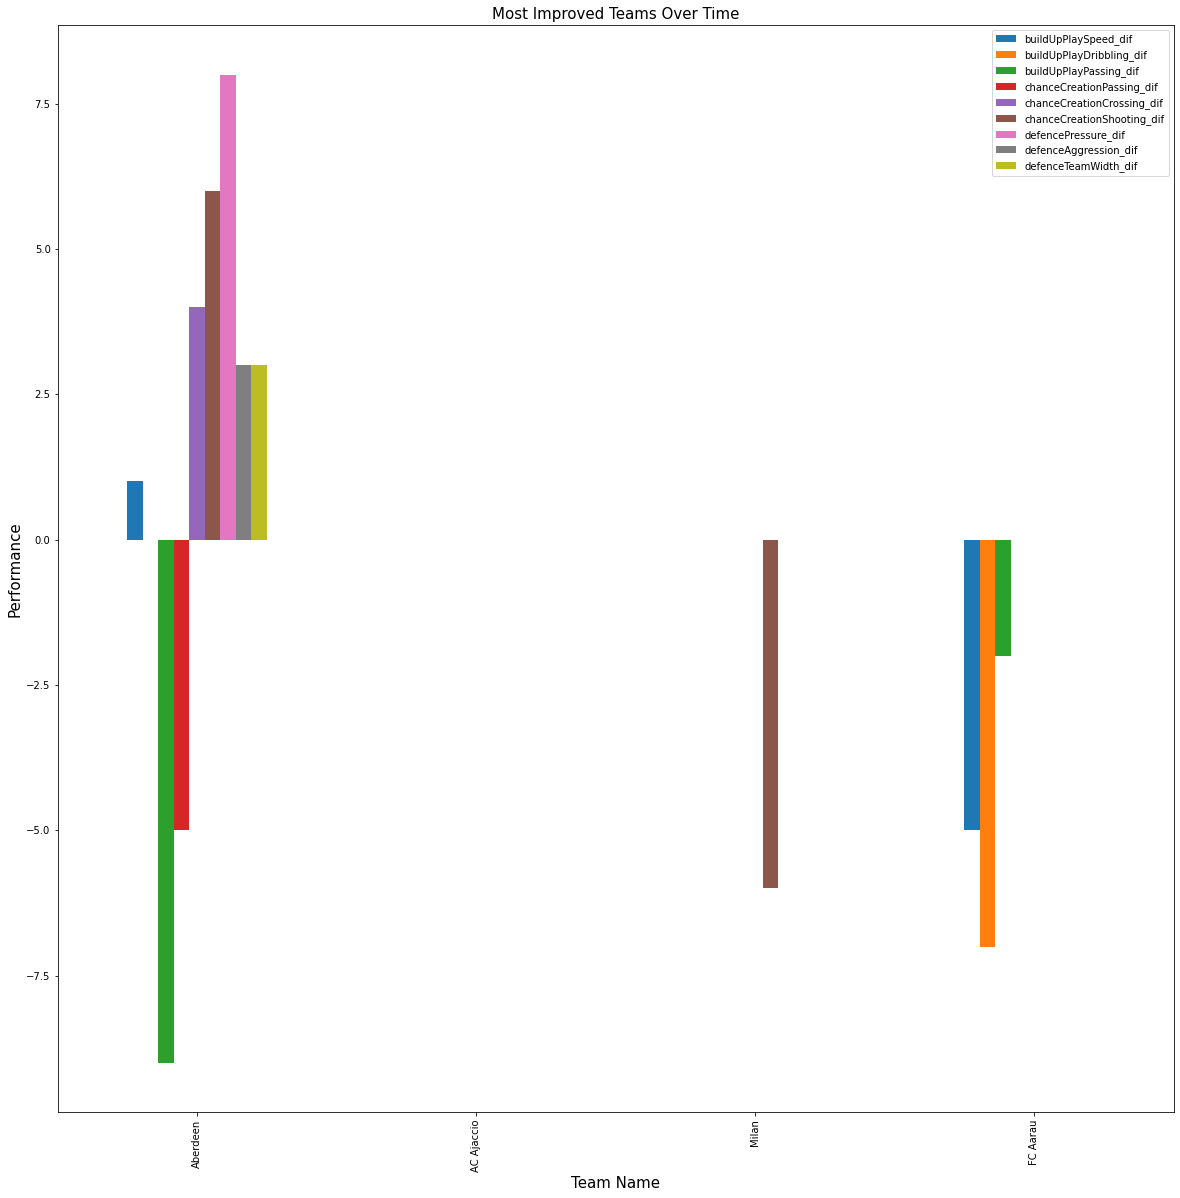

In [86]:
graph.plot(kind='bar',figsize = (20,20));
plt.xlabel('Team Name',fontsize = 15);  
plt.ylabel('Performance',fontsize = 15);  
plt.title('Most Improved Teams Over Time',fontsize = 15);   

__From above, we can see that Carpi, VfL Bochum, Jagiellonia Białystok are the most improved teams__

### Research Question 3  (Which players had the most penalties?)

In [87]:
df_player.reset_index(inplace=True)
df_player.head()

,player_name,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,...,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,birthday,height,weight
0,Aaron Appindangoye,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1992-02-29 00:00:00,182.88,187
1,Aaron Appindangoye,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1992-02-29 00:00:00,182.88,187
2,Aaron Appindangoye,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,...,66.0,69.0,6.0,11.0,10.0,8.0,8.0,1992-02-29 00:00:00,182.88,187
3,Aaron Appindangoye,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,...,63.0,66.0,5.0,10.0,9.0,7.0,7.0,1992-02-29 00:00:00,182.88,187
4,Aaron Appindangoye,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,...,63.0,66.0,5.0,10.0,9.0,7.0,7.0,1992-02-29 00:00:00,182.88,187


In [88]:
penalties = df_player.sort_values(by=['penalties'],ascending=False)

In [89]:
penalties = penalties.iloc[:60]
penalties.drop_duplicates(keep = 'first',inplace = True)


In [90]:
penalties

,player_name,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,...,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,birthday,height,weight
146683,Rickie Lambert,75.0,75.0,right,high,medium,67.0,81.0,84.0,66.0,...,26.0,19.0,13.0,15.0,7.0,16.0,11.0,1982-02-16 00:00:00,187.96,170
146682,Rickie Lambert,75.0,75.0,right,high,medium,67.0,81.0,84.0,66.0,...,26.0,19.0,13.0,15.0,7.0,16.0,11.0,1982-02-16 00:00:00,187.96,170
146680,Rickie Lambert,75.0,75.0,right,high,medium,67.0,81.0,84.0,66.0,...,26.0,19.0,13.0,15.0,7.0,16.0,11.0,1982-02-16 00:00:00,187.96,170
111342,Mario Balotelli,84.0,90.0,right,medium,low,67.0,83.0,73.0,75.0,...,25.0,25.0,13.0,6.0,11.0,6.0,8.0,1990-08-12 00:00:00,187.96,194
146688,Rickie Lambert,76.0,76.0,right,high,medium,66.0,80.0,85.0,65.0,...,25.0,25.0,12.0,14.0,6.0,15.0,10.0,1982-02-16 00:00:00,187.96,170
146686,Rickie Lambert,76.0,76.0,right,high,medium,66.0,81.0,85.0,65.0,...,25.0,25.0,12.0,14.0,6.0,15.0,10.0,1982-02-16 00:00:00,187.96,170
146685,Rickie Lambert,76.0,76.0,right,high,medium,66.0,81.0,85.0,65.0,...,25.0,25.0,12.0,14.0,6.0,15.0,10.0,1982-02-16 00:00:00,187.96,170
146684,Rickie Lambert,76.0,76.0,right,high,medium,66.0,81.0,85.0,65.0,...,25.0,25.0,12.0,14.0,6.0,15.0,10.0,1982-02-16 00:00:00,187.96,170
11812,Andrea Pirlo,87.0,90.0,right,low,medium,91.0,64.0,58.0,97.0,...,64.0,57.0,8.0,22.0,97.0,22.0,22.0,1979-05-19 00:00:00,177.80,150
11813,Andrea Pirlo,87.0,93.0,right,low,medium,91.0,64.0,58.0,97.0,...,64.0,57.0,8.0,22.0,97.0,22.0,22.0,1979-05-19 00:00:00,177.80,150


In [91]:
penalties.drop(columns=['overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate','defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy','short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy','long_passing', 'ball_control', 'acceleration', 'sprint_speed','agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina','strength', 'long_shots', 'aggression', 'interceptions', 'positioning','vision', 'marking', 'standing_tackle', 'sliding_tackle','gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning','gk_reflexes', 'birthday', 'height', 'weight'],inplace=True)

In [92]:
penalties.set_index('player_name',inplace=True)

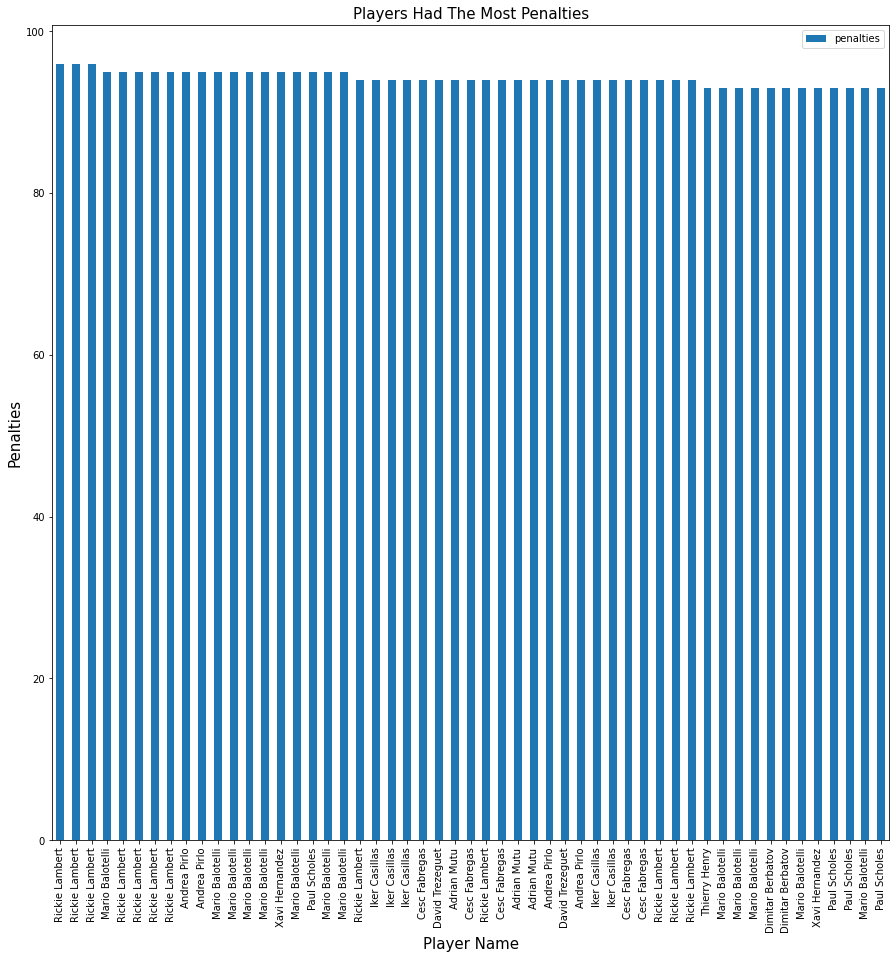

In [93]:
penalties.plot(kind='bar',figsize = (15,15));
plt.xlabel('Player Name',fontsize = 15);  
plt.ylabel('Penalties',fontsize = 15);  
plt.title('Players Had The Most Penalties',fontsize = 15);  

__From above, we can see that Rickie Lambert have the most penalties__

### Research Question 4  (What team attributes lead to the most victories?)

In [94]:
df_match.head(5)

,id,country,league,season,stage,winner
2,3,Belgium,Belgium Jupiler League,2008/2009,1,8635
3,4,Belgium,Belgium Jupiler League,2008/2009,1,9991
4,5,Belgium,Belgium Jupiler League,2008/2009,1,9985
7,8,Belgium,Belgium Jupiler League,2008/2009,1,9996
8,9,Belgium,Belgium Jupiler League,2008/2009,1,10001


In [95]:
df_match.drop(columns=['id','country','season','stage'],inplace=True)

In [96]:
df_match.sort_values(by = ['winner'],ascending = False,inplace=True)


In [97]:
df_match.drop_duplicates(keep = 'first',inplace = True)

In [98]:
most_winner = df_match[:15]
graph = most_winner.groupby('league')['winner'].count()

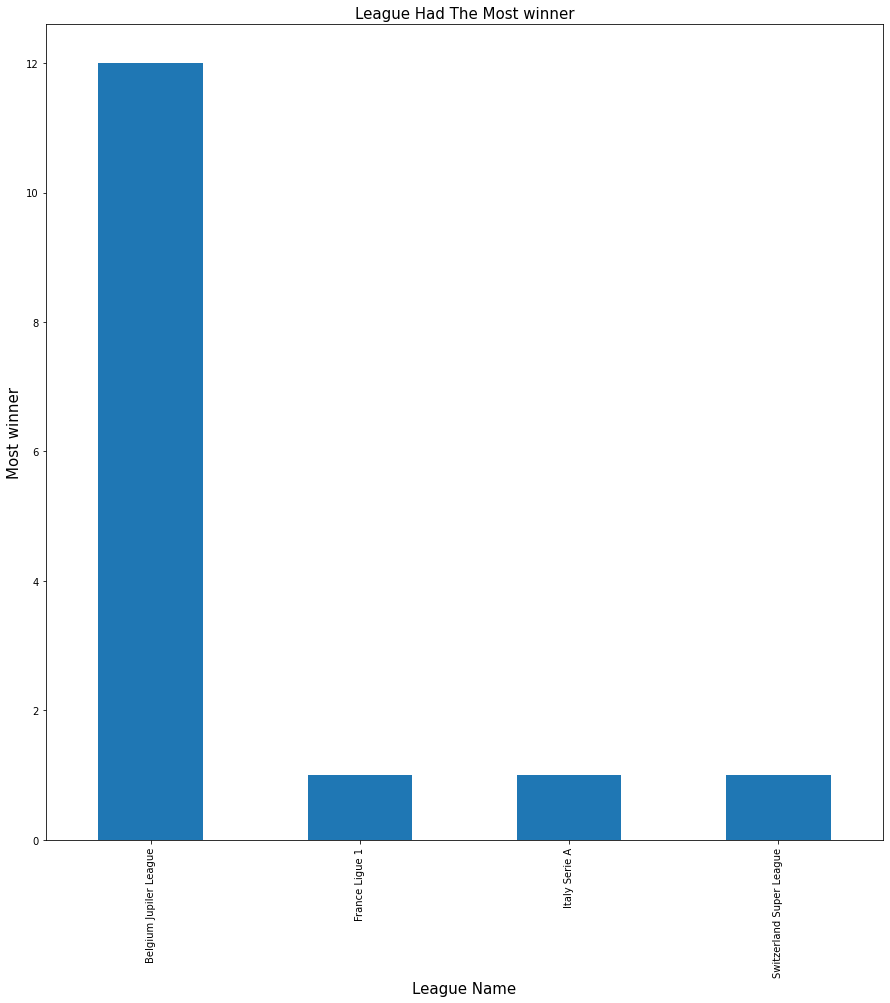

In [99]:
graph.plot(kind='bar',figsize = (15,15));
plt.xlabel('League Name',fontsize = 15);  
plt.ylabel('Most winner',fontsize = 15);  
plt.title('League Had The Most winner',fontsize = 15);

__From above, we can see that Belgium Jupiler League have the most win__

<a id='conclusions'></a>
## Conclusions

> 1- Spain LIGA BBVA, England Premier League, Italy Serie A have the most wins during 2008-2016.<br>2- CCarpi, VfL Bochum, Jagiellonia Białystok are the most improved teams over period of time.<br>3- Rickie Lambert have the most penalties.<br>4- Belgium Jupiler League have the most win.
<br>
<br>
<a id='conclusions'></a>
## Limitation

> 1- A lot of missing values.<br>2- No correlation between player name and his corresponding team.
